# Creating a Text Classifier for Blog Posts

## Contents:
- Problem Statement
- Exploratory Data Analysis
- Data Balancing
- Feature Engineering
- Data Cleaning
- Train Test Split
- Model Creation
- Model Performance Evaluation


# Problem Statement: 

Create a text classifier that groups blog posts into 'technology and science' or 'other'

# EDA:

In [2]:
#importing packages for data manipulation, plotting, and working with dates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dateutil.parser import parse
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [3]:
#read in the data
data = pd.read_csv('blogtext.csv')
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [4]:
#how many of each topic are there? We are most interested in science and technology
data['topic'].value_counts(dropna=False)

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [5]:
#Feature Engineering:
#create new column that defines a blog post as 'tech_and_science' or 'other'
def binary_topic(row):
    if row['topic'] == 'Technology':
        group = 'tech_and_science'
    elif row['topic'] == 'Science':
        group = 'tech_and_science'
    else:
        group = 'other'
    return group

data['binary_topic'] = data.apply(binary_topic, axis=1)

#create label coding 
data['label_codes'] = [1 if x =='tech_and_science' else 0 for x in data['binary_topic']]

data['label_codes'].value_counts()

0    631960
1     49324
Name: label_codes, dtype: int64

# Data Balancing:

Class 0: 631960
Class 1: 49324
Proportion: 12.81 : 1


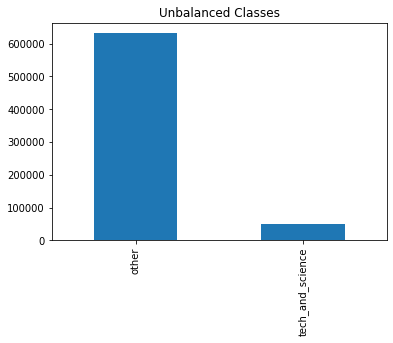

In [6]:
#Show unbalanced data
count = data.binary_topic.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Unbalanced Classes')

In [7]:
#take subset of the data for demo, with intention of rerunning on cloud servers with all data later
df1 = data[data['binary_topic'] == 'tech_and_science']
df2 = data[data['binary_topic'] != 'tech_and_science']

print(df1['binary_topic'].value_counts())
print(df2['binary_topic'].value_counts())

#sample 50000 rows from the dataframe with only other category
df2_sample = df2.sample(n = 50000)

#now paste them back together
sample_data = pd.concat([df1, df2_sample], ignore_index=True)

#delete extra dataframes to free up memory
list = [df1,df2,df2_sample]
del list

tech_and_science    49324
Name: binary_topic, dtype: int64
other    631960
Name: binary_topic, dtype: int64


In [8]:
#check current balance
sample_data['binary_topic'].value_counts()

other               50000
tech_and_science    49324
Name: binary_topic, dtype: int64

Class 0: 50000
Class 1: 49324
Proportion: 1.01 : 1


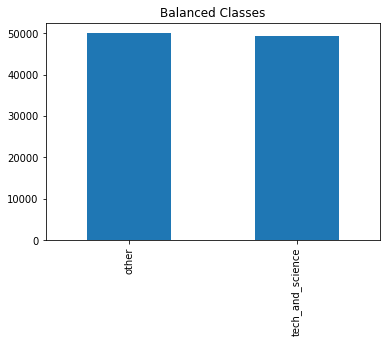

In [9]:
#Show balanced data
count = sample_data.binary_topic.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Balanced Classes')

In [10]:
sample_data['id'].nunique()
sample_data.head()

,id,gender,age,topic,sign,date,text,binary_topic,label_codes
0,3667495,male,15,Science,Libra,"14,June,2004",Master Seaworld(Pictured ab...,tech_and_science,1
1,3667495,male,15,Science,Libra,"14,June,2004",Until i can figure out how to...,tech_and_science,1
2,3667495,male,15,Science,Libra,"16,June,2004",After complicated research an...,tech_and_science,1
3,3667495,male,15,Science,Libra,"17,June,2004",ONCE APON A TIME----THERE...,tech_and_science,1
4,3667495,male,15,Science,Libra,"17,June,2004",Me and my people in the ghett...,tech_and_science,1


In [79]:
sample_data.to_csv('sample_data.csv', index = False)

# Text Cleaning:

In [11]:
#Some samples before text cleaning:
sample_data.text[5]

"                  This is the fan club of John Reed.In most of the cases,i dont use last names, but this time its special. its John Reed. there are so many jonhs so we have to put on his last name. The reason why John Reed has a fan club?:well he just does.(i cant think of it at the moment)MOst Famous Phase: 'How many Times DO i have to Tell you, There are no ghettos in Lexington!'.yeah like that true. You better leave this kid alone-he can chop down trees with his head!  MEMBERS: DANIELLE Caitlin Jonhathan        "

In [12]:
import nltk
import string
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/aleks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Remove Punctuation


In [13]:
def remove_punctuation(text):
    no_punctuation = "".join([c for c in text if c not in string.punctuation])
    return no_punctuation

In [14]:
sample_data['clean_text'] = [remove_punctuation(text) for text in sample_data.text]

### Lower Case

In [15]:
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

sample_data['clean_text'] = [to_lower(text) for text in sample_data.clean_text]

### Removing Stop Words

In [16]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')

def remove_stopwords(text):
    word_tokens = nltk.word_tokenize(text)
    no_stopwords = [word for word in word_tokens if word not in stopword]
    return no_stopwords
    
sample_data['clean_text'] = [remove_stopwords(text) for text in sample_data.clean_text]

In [17]:
#Some samples after text cleaning:
sample_data.clean_text[5]

['fan',
 'club',
 'john',
 'reedin',
 'casesi',
 'dont',
 'use',
 'last',
 'names',
 'time',
 'special',
 'john',
 'reed',
 'many',
 'jonhs',
 'put',
 'last',
 'name',
 'reason',
 'john',
 'reed',
 'fan',
 'clubwell',
 'doesi',
 'cant',
 'think',
 'momentmost',
 'famous',
 'phase',
 'many',
 'times',
 'tell',
 'ghettos',
 'lexingtonyeah',
 'like',
 'true',
 'better',
 'leave',
 'kid',
 'alonehe',
 'chop',
 'trees',
 'head',
 'members',
 'danielle',
 'caitlin',
 'jonhathan']

In [18]:
#Some samples after text cleaning:
sample_data.clean_text[5]

['fan',
 'club',
 'john',
 'reedin',
 'casesi',
 'dont',
 'use',
 'last',
 'names',
 'time',
 'special',
 'john',
 'reed',
 'many',
 'jonhs',
 'put',
 'last',
 'name',
 'reason',
 'john',
 'reed',
 'fan',
 'clubwell',
 'doesi',
 'cant',
 'think',
 'momentmost',
 'famous',
 'phase',
 'many',
 'times',
 'tell',
 'ghettos',
 'lexingtonyeah',
 'like',
 'true',
 'better',
 'leave',
 'kid',
 'alonehe',
 'chop',
 'trees',
 'head',
 'members',
 'danielle',
 'caitlin',
 'jonhathan']

In [19]:
#Other stuff I could do: delete contractions, mispellings, lemmatize, possessive pronouns, special chars, etc.

In [ ]:
sample_data.to_csv('sample_data.csv', index = False)

# Train Test Split

In [20]:
sample_data.head()

,id,gender,age,topic,sign,date,text,binary_topic,label_codes,clean_text
0,3667495,male,15,Science,Libra,"14,June,2004",Master Seaworld(Pictured ab...,tech_and_science,1,"[master, seaworldpictured, willyis, town, hero..."
1,3667495,male,15,Science,Libra,"14,June,2004",Until i can figure out how to...,tech_and_science,1,"[figure, put, pics, website, well, dead, wan, ..."
2,3667495,male,15,Science,Libra,"16,June,2004",After complicated research an...,tech_and_science,1,"[complicated, research, many, nights, awake, m..."
3,3667495,male,15,Science,Libra,"17,June,2004",ONCE APON A TIME----THERE...,tech_and_science,1,"[apon, timethere, angery, kid, named, john, re..."
4,3667495,male,15,Science,Libra,"17,June,2004",Me and my people in the ghett...,tech_and_science,1,"[people, ghetto, support, ghetto, police, worl..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [33]:
#First check data type for clean text column

In [29]:
#Change clean text to string type
sample_data['clean_text'] = sample_data['clean_text'].astype(str)

In [30]:
sample_data['clean_text'].dtypes

dtype('O')

In [38]:
sample_data.head()

,id,gender,age,topic,sign,date,text,binary_topic,label_codes,clean_text
0,3667495,male,15,Science,Libra,"14,June,2004",Master Seaworld(Pictured ab...,tech_and_science,1,"['master', 'seaworldpictured', 'willyis', 'tow..."
1,3667495,male,15,Science,Libra,"14,June,2004",Until i can figure out how to...,tech_and_science,1,"['figure', 'put', 'pics', 'website', 'well', '..."
2,3667495,male,15,Science,Libra,"16,June,2004",After complicated research an...,tech_and_science,1,"['complicated', 'research', 'many', 'nights', ..."
3,3667495,male,15,Science,Libra,"17,June,2004",ONCE APON A TIME----THERE...,tech_and_science,1,"['apon', 'timethere', 'angery', 'kid', 'named'..."
4,3667495,male,15,Science,Libra,"17,June,2004",Me and my people in the ghett...,tech_and_science,1,"['people', 'ghetto', 'support', 'ghetto', 'pol..."


In [ ]:
#Now do train test split
X_train, X_test, y_train, y_test = train_test_split(sample_data['clean_text'],
sample_data['label_codes'], test_size = 0.20, random_state = 8)


In [49]:
#How many blog posts in teach group after test train split
print(len(X_train))
print(len(X_test))

79459
19865


# Text Representation  


I'll use TF-IDF Vectors as features

In [64]:
X_train

93868    ['apparently', 'urllink', 'abc', 'quandary', '...
9766     ['little', 'difficult', 'motivated', 'work', '...
98864    ['hilights', 'playing', 'name', 'game', 'mike'...
74477     ['urllink', 'wide', 'eyed', 'hopefully', 'wild']
1372                  ['urllink', 'fotography', 'forgery']
                               ...                        
10376    ['810', 'page', 'research', 'paper', 'due', '3...
62426              ['really', 'matter', 'question', 'day']
18417     ['introducing', 'urllink', 'sticky', 'drawings']
25940                        ['urllink', 'let', 'forever']
70083    ['urllink', 'httpuknewsyahoocom02092580daczcht...
Name: clean_text, Length: 79459, dtype: object

In [58]:
#Try alternate approach:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(79459, 309894)

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(79459, 309894)

# Build Model (Naive Bayes)

In [60]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [62]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),
])
text_clf = text_clf.fit(X_train, y_train)

# Evaluate Naive Bayes Model

In [63]:
import numpy as np
#twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.6680594009564561

# Build SVM Model

In [69]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)),
 ])
_ = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.593103448275862

# Tune Models Using GridSearch to Improve Performance

In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [72]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [74]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.6820498657930205
{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [ ]:
#Now improve SVM

In [75]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf-svm__alpha': (1e-2, 1e-3),
}
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [76]:
gs_clf_svm.best_score_

0.5965844556159654

In [ ]:
# Repeat Process with Different TF IDF
#Encoder = LabelEncoder()
#Train_Y = Encoder.fit_transform(Train_Y)
#Test_Y = Encoder.fit_transform(Test_Y)



In [77]:
#GET HELP FROM EVAN:

# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

label_codes = {
    'tech_and_science': 1,
    'other': 0
}

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(79459, 300)
(19865, 300)


In [78]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(label_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'other' category:
  . Most correlated unigrams:
. mom
. school
. im
. love
. urllink
  . Most correlated bigrams:
. dont know
. gon na

# 'tech_and_science' category:
  . Most correlated unigrams:
. mom
. school
. im
. love
. urllink
  . Most correlated bigrams:
. dont know
. gon na



Wishlist for if I had more time:
- Use SMOTE or random oversampling with tf-Idf representation of texts when balancing classes 
- Remove outliers in terms of blog post length
- Do much more thorough text cleaning
- Try out several other models such as random forest and pick which one performs best